<a href="https://colab.research.google.com/github/raquelvargas16/MIAR-Python-Activities/blob/main/Proyecto_RN_Enunciado_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=fecea21e48c53e26b5f540f3453eb8fb697f5a8e8f927e91227d7f80599dffa0
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [7]:
!pip install opendatasets

In [1]:
# Funciones base
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x, batch_size=128)
  print(classification_report(y, predictions.argmax(axis=1)))

In [1]:
# Cargar kaggle.json con credenciales
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"raquelvargasvivanco","key":"6fadb604b725c31af8989963c9b761d5"}'}

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
print(tf.__version__)

2.15.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import opendatasets as od

In [9]:
# Descargar dataset de Kaggle
dataset = "https://www.kaggle.com/datasets/gpiosenka/100-bird-species/download?datasetVersionNumber=65"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: raquelvargasvivanco
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species


100%|██████████| 1.96G/1.96G [01:30<00:00, 23.3MB/s]


In [6]:
ls 100-bird-species/

 birds.csv  'EfficientNetB0-525-(224 X 224)- 98.97.h5'   test/   train/   valid/


In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
data_dir = "100-bird-species/train/"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 84635 files belonging to 525 classes.
Using 67708 files for training.


In [9]:
data_dir_val = "100-bird-species/valid/"
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_val,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2625 files belonging to 525 classes.


In [10]:
data_dir_test = "100-bird-species/test/"
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2625 files belonging to 525 classes.


In [11]:
class_names = train_ds.class_names
print(class_names[0:10])

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS']


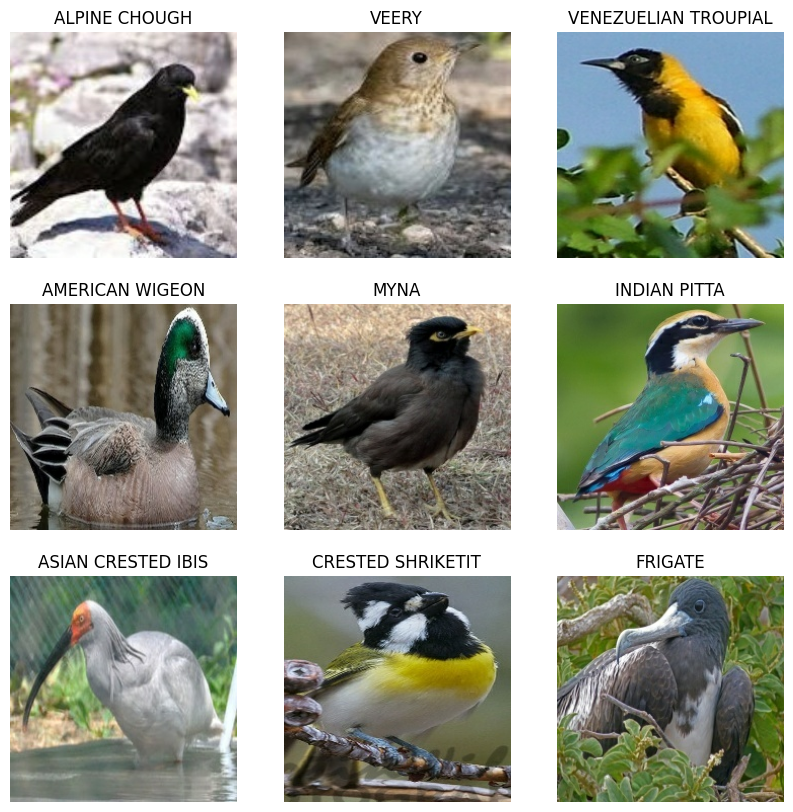

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Data Augmentation

In [13]:
# Rotación aleatoria
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[ 41  44 377 502 391 116 425 188 227 221 322 250 389 155 325 346 491 115
 244 170  74 245 330  39 291 372 292 349 479 312  61  37], shape=(32,), dtype=int32)
41


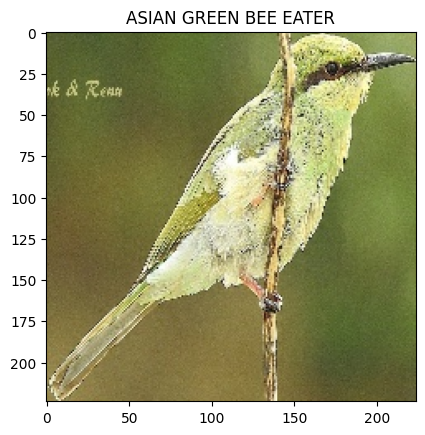

In [14]:
image, label = next(iter(train_ds))
bird_img = image[0]
bird_label = int(label[0])
print(type(bird_img))
print(label)
print(bird_label)
_ = plt.imshow(bird_img.numpy().astype("uint8"))
_ = plt.title(class_names[bird_label])

In [15]:
# Add the image to a batch.
image = tf.expand_dims(bird_img, 0)

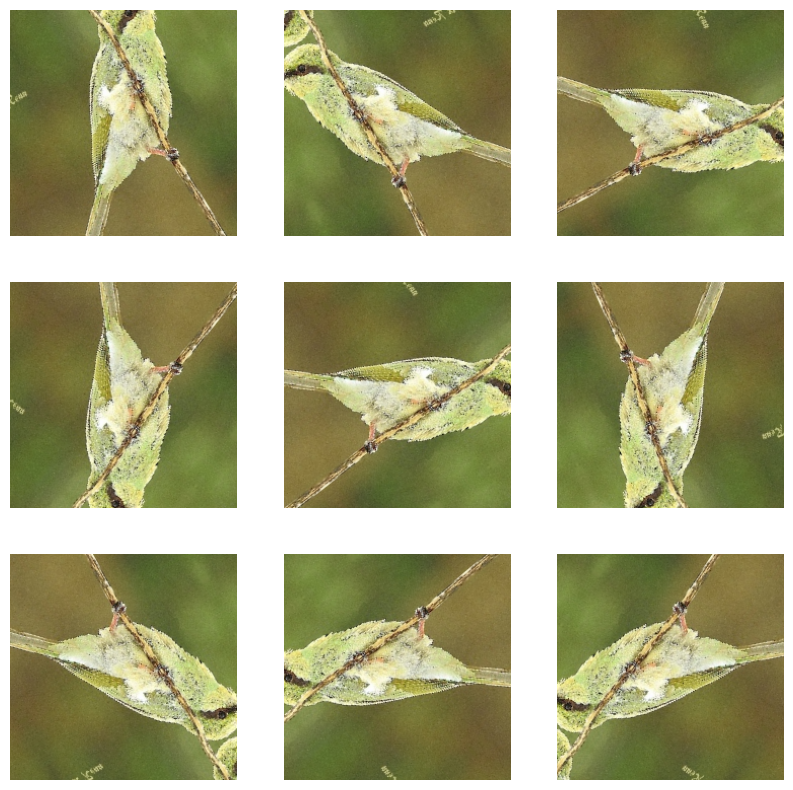

In [16]:
# Visualizar data augmentation
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [17]:
AUTOTUNE = tf.data.AUTOTUNE
num_classes = 525
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Red Convolucional 1

In [18]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
#tf.config.set_visible_devices([], 'CPU') # hide the CPU
tf.config.set_visible_devices(gpus[0], 'GPU') # unhide potentially hidden GPU
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Red Convolucional vista en clase (3 bloques)

In [20]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

# 1.BASE MODEL
input = layers.Input(shape = (224, 224, 3))
# Bloque 1
x1 = layers.RandomFlip("horizontal_and_vertical"),
x1 = layers.RandomRotation(0.2)
x1 = layers.Rescaling(1./255)
x1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)
# Bloque 2
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)
# Bloque 3
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)
# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x3)
predictions = layers.Dense(num_classes, activation='softmax')(gap)

# 3. Unimos las entradas y salidas del modelo
convnet = Model(inputs=input, outputs=predictions)
convnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0     

In [21]:
from tensorflow.keras.optimizers import Adam
# Compilación
convnet.compile(optimizer=Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
                )

In [22]:
import keras
# Callbacks
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
# Entrenamos el modelo
H_callback = convnet.fit(train_ds,
                         batch_size=batch_size,
                         epochs=50,
                         validation_data=val_ds,
                         callbacks=callback)

Epoch 1/50
2116/2116 [==============================] - 84s 37ms/step - loss: 5.1871 - accuracy: 0.0601 - val_loss: 4.6128 - val_accuracy: 0.1204
Epoch 2/50
2116/2116 [==============================] - 72s 34ms/step - loss: 3.8431 - accuracy: 0.2153 - val_loss: 4.0692 - val_accuracy: 0.2331
Epoch 3/50
2116/2116 [==============================] - 72s 34ms/step - loss: 2.8777 - accuracy: 0.3773 - val_loss: 2.4397 - val_accuracy: 0.4651
Epoch 4/50
2116/2116 [==============================] - 72s 34ms/step - loss: 2.2475 - accuracy: 0.4995 - val_loss: 1.9865 - val_accuracy: 0.5543
Epoch 5/50
2116/2116 [==============================] - 72s 34ms/step - loss: 1.8349 - accuracy: 0.5831 - val_loss: 1.7603 - val_accuracy: 0.6000
Epoch 6/50
2116/2116 [==============================] - 72s 34ms/step - loss: 1.5456 - accuracy: 0.6436 - val_loss: 1.4948 - val_accuracy: 0.6472
Epoch 7/50
2116/2116 [==============================] - 72s 34ms/step - loss: 1.3322 - accuracy: 0.6890 - val_loss: 1.5097 -

### Evaluación del modelo

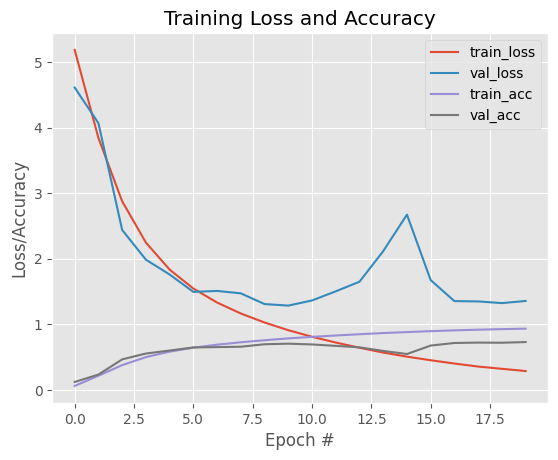

In [23]:
# Evaluación + Testeo

# Learning curves
visualize_learning_curve(H_callback)

In [24]:
# Evaluando el modelo de predicción con las imágenes de test
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = convnet.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 0s 147ms/step


In [25]:
print(classification_report(correct_labels, predicted_labels,
                            #labels=class_names
                            )
)

              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.00      0.00      0.00         5
           2       0.60      0.60      0.60         5
           3       0.60      0.60      0.60         5
           4       1.00      0.80      0.89         5
           5       1.00      0.20      0.33         5
           6       1.00      1.00      1.00         5
           7       0.30      0.60      0.40         5
           8       0.83      1.00      0.91         5
           9       0.75      0.60      0.67         5
          10       1.00      0.40      0.57         5
          11       0.67      0.80      0.73         5
          12       0.50      0.20      0.29         5
          13       1.00      0.20      0.33         5
          14       0.75      0.60      0.67         5
          15       1.00      0.60      0.75         5
          16       0.44      0.80      0.57         5
          17       0.30    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Guardar modelo

In [27]:
model_name = 'convnet_data_augmentation'
convnet.save(model_name)

In [28]:
model_path = "/content/drive/MyDrive/MIAR - Redes neuronales y Deep Learning/Proyecto Redes Neuronales/" + model_name
convnet.save(model_path, save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
ls

 100-bird-species/                drive/             modelname/
 convnet_sin_data_augmentation/  'kaggle (1).json'   sample_data/


In [ ]:
model = tf.keras.models.load_model(model_path)